### 5.1.Introduction
In this step we will combine what we have learnt from preprocessing and training step to decide our final model and save it for further use

## 5.2 Imports

In [20]:
#Code task 1#
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
from imblearn.over_sampling import RandomOverSampler,ADASYN,SMOTE
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
#Code task 1#


## 5.3 Load Data

In [2]:
vfl=pd.read_csv('vflabel.csv',index_col=0)

In [3]:
vfl.head(5).T

,0,1,2,3,4
Month,Dec,Jan,Oct,Jun,Jan
WeekOfMonth,5,3,5,2,5
DayOfWeek,Wednesday,Wednesday,Friday,Saturday,Monday
Make,Honda,Honda,Honda,Toyota,Honda
AccidentArea,Urban,Urban,Urban,Rural,Urban
DayOfWeekClaimed,Tuesday,Monday,Thursday,Friday,Tuesday
MonthClaimed,Jan,Jan,Nov,Jul,Feb
WeekOfMonthClaimed,1,4,2,1,2
Sex,Female,Male,Male,Male,Female
MaritalStatus,Single,Single,Married,Married,Single


In [4]:
cols=['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'Deductible', 'DriverRating',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy',
       'age_bins']

## 5.4.1 Preparing data for balancing using SMOTEN

***This method is used for balancing as it is more suitable for categorical data compared to SMOTE and other methods***

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTEN.html

### Installing New Version of imblearn for SMOTEN

In [5]:
! pip install imbalanced-learn==0.9.0

  Using cached imbalanced_learn-0.9.0-py3-none-any.whl (199 kB)
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.9.1
    Uninstalling imbalanced-learn-0.9.1:
      Successfully uninstalled imbalanced-learn-0.9.1


### Data preperation using SMOTEN, and Train Test Split 

In [8]:
### https://github.com/pujappathak/Credit-Card-Fraud-Detection/blob/main/Puja%20Pathak%20-%20Capstone%20Project%20-%20Credit%20Card%20Fraud%20Detection.ipynb
## SMOTEN OVER SAMPLING
X=vfl.drop(columns='FraudFound_P')
Y=vfl.FraudFound_P
X.info()
from imblearn.over_sampling import SMOTEN
smt = SMOTEN(random_state=45, k_neighbors=5)
X_resampled_sm, y_resampled_sm = smt.fit_resample(X,Y)
print(f"Total length of len:{len(X_resampled_sm)}")
print(f"New Distribution of out target label:{sorted(Counter(y_resampled_sm).items())}")   


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15420 entries, 0 to 15419
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Fault                 15420 non-null  object
 11  PolicyType            15420 non-null  object
 12  VehicleCategory       15420 non-null  object
 13  VehiclePrice          15420 non-null  object
 14  Deductible            15420 non-null  int64 
 15  DriverRating          15420 non-null

### 5.5.1 Using Weight of evidence encoder with SMOTEN balanced data
####  Transforming train and test data

In [10]:
import category_encoders as ce
woe = ce.WOEEncoder(cols=cols)

In [11]:
#Peform the train test split 
X_trw, X_tew, y_trw, y_tew = train_test_split(X_resampled_sm, y_resampled_sm, test_size=0.2, 
                                                    random_state=47,stratify=y_resampled_sm)

In [12]:
lab_train = woe.fit_transform(X_trw, y_trw)
lab_test=woe.transform(X_tew)

In [13]:
lab_traindf=pd.concat([lab_train,y_trw],axis='columns')
lab_testdf=pd.concat([lab_test,y_tew],axis='columns')
lab_traindf.head(5).T

,4029,571,15470,8696,8616
Month,-0.078566,0.211022,-0.021710,-0.165756,0.193290
WeekOfMonth,-0.449059,0.057750,0.057750,0.095910,0.057750
DayOfWeek,0.510912,0.481114,-0.598353,0.510912,-0.495738
Make,0.151281,0.151281,0.135524,0.022866,0.151281
AccidentArea,-0.024877,-0.024877,-0.024877,-0.024877,-0.024877
DayOfWeekClaimed,0.228840,0.009143,0.333106,0.333106,0.009143
MonthClaimed,0.026947,0.524674,0.026947,0.253246,0.253246
WeekOfMonthClaimed,0.311566,0.033520,0.033520,0.033520,-0.163320
Sex,0.082919,0.082919,0.082919,0.082919,0.082919
MaritalStatus,0.243596,0.243596,0.243596,0.243596,0.243596


### 5.5.1 Optimizing class weights on SMOTEN balanced data with tuned Logistic Regression Model

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
{'class_weight': {0: 0.4477386934673367, 1: 0.5522613065326634}}


C:\Users\vrastogi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Scoring for different class weights')

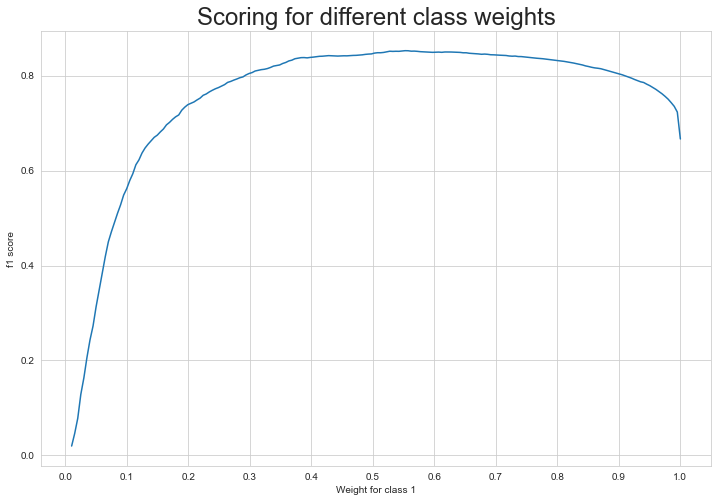

In [15]:
## https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/
#importing and training the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
lr = LogisticRegression(C=9.921,dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1122, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(5), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(lab_train,y_trw)
print(gridsearch.best_params_)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('f1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

***The best class weights for maximizing f1 score***


{'class_weight': {0: 0.4477386934673367, 1: 0.5522613065326634}}

### Checking the performance on train and test data with new class weights

The f1 score for the training data: 0.8536803578690525
The f1 score for the testing data: 0.8519177860495225
Train 
               precision    recall  f1-score   support

           0       0.89      0.78      0.83     11598
           1       0.81      0.91      0.85     11597

    accuracy                           0.84     23195
   macro avg       0.85      0.84      0.84     23195
weighted avg       0.85      0.84      0.84     23195

Test 
               precision    recall  f1-score   support

           0       0.89      0.78      0.83      2899
           1       0.80      0.91      0.85      2900

    accuracy                           0.84      5799
   macro avg       0.85      0.84      0.84      5799
weighted avg       0.85      0.84      0.84      5799



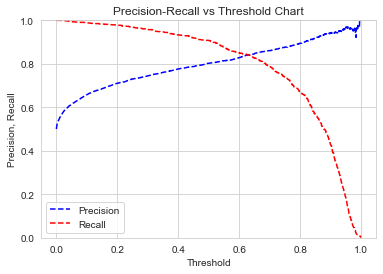

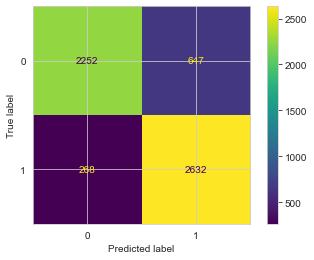

In [42]:
#importing and training the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
lr = LogisticRegression(C=9.921,dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1122, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False, class_weight={0: 0.4477386934673367, 1: 0.5522613065326634})
lr.fit(lab_train,y_trw)

# Predicting on the test data
pred_train = lr.predict(lab_train)
pred_test = lr.predict(lab_test)

#Calculating and printing the f1 score 
f1_train = f1_score(y_trw, pred_train)
f1_test = f1_score(y_tew, pred_test)
print('The f1 score for the training data:', f1_train)
print('The f1 score for the testing data:', f1_test)
### Predict test_y values and probabilities based on fitted logistic 
### regression model

pred_y=lr.predict(lab_test) 

probs_y=lr.predict_proba(lab_test) 
  # probs_y is a 2-D array of probability of being labeled as 0 (first column of array) vs 1 (2nd column in array)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_tew, probs_y[:, 
1]) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

#Ploting the confusion matrix
cm=confusion_matrix(y_tew,pred_test,labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)
disp.plot()
print("Train \n",classification_report(y_trw,pred_train))
print("Test \n",classification_report(y_tew,pred_test))
plt.show()


***The f1 score improved signifincantly with this set up(SMOTEN+Weight of Evidence Encoder+ Class Weight Optimization)***

The f1 score for the training data: 0.8536803578690525

The f1 score for the testing data: 0.8519177860495225

Best Threshold=0.504609, F-Score=0.852


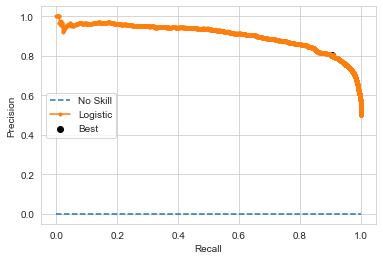

In [24]:
## https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
model = LogisticRegression(C=9.921,dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1122, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False, class_weight={0: 0.4477386934673367, 1: 0.5522613065326634})
model.fit(lab_train,y_trw)
# predict probabilities
yhat = model.predict_proba(lab_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
precision, recall, thresholds = precision_recall_curve(y_tew, yhat)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len([y_tew==1]) / len(y_tew)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

***With Weight of Evidence Encoding***

Best Threshold=0.504609, F-Score=0.852

### 5.5.1 Using CatBoost encoder with SMOTEN balanced data

#### Transforming train and test data

In [29]:
import category_encoders as ce
CBE= ce.CatBoostEncoder(cols=cols)

In [30]:
CBE_train = CBE.fit_transform(X_trw, y_trw)
CBE_test=CBE.transform(X_tew)

In [31]:
CBE_traindf=pd.concat([lab_train,y_trw],axis='columns')
CBE_testdf=pd.concat([lab_test,y_tew],axis='columns')
CBE_traindf.head(5).T

,4029,571,15470,8696,8616
Month,-0.078566,0.211022,-0.021710,-0.165756,0.193290
WeekOfMonth,-0.449059,0.057750,0.057750,0.095910,0.057750
DayOfWeek,0.510912,0.481114,-0.598353,0.510912,-0.495738
Make,0.151281,0.151281,0.135524,0.022866,0.151281
AccidentArea,-0.024877,-0.024877,-0.024877,-0.024877,-0.024877
DayOfWeekClaimed,0.228840,0.009143,0.333106,0.333106,0.009143
MonthClaimed,0.026947,0.524674,0.026947,0.253246,0.253246
WeekOfMonthClaimed,0.311566,0.033520,0.033520,0.033520,-0.163320
Sex,0.082919,0.082919,0.082919,0.082919,0.082919
MaritalStatus,0.243596,0.243596,0.243596,0.243596,0.243596


### Optimizing class weights on SMOTEN balanced data with tuned Logistic Regression Model

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
{'class_weight': {0: 0.4129145728643216, 1: 0.5870854271356785}}


C:\Users\vrastogi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Scoring for different class weights')

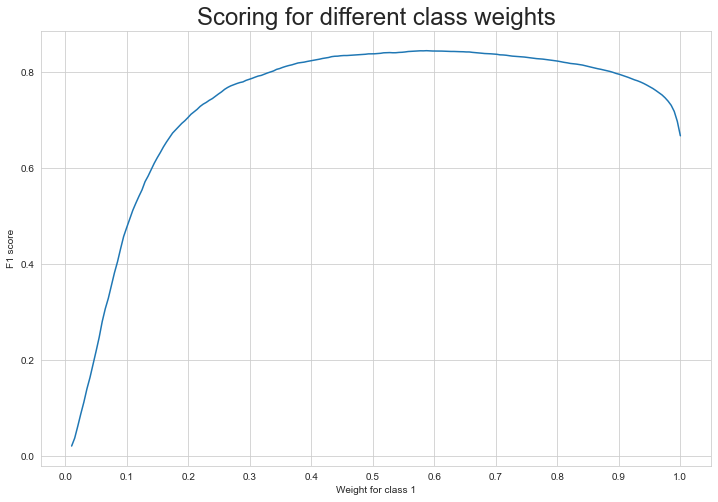

In [32]:
## https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/
#importing and training the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
lr = LogisticRegression(C=9.921,dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1122, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(5), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(CBE_train,y_trw)
print(gridsearch.best_params_)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

***The best class weights for maximizing f1 score***

'class_weight': {0: 0.4129145728643216, 1: 0.5870854271356785}

### Checking the performance on train and test data with new class weights

The f1 score for the training data: 0.8448937190346812
The f1 score for the testing data: 0.8439889376931836
Train 
               precision    recall  f1-score   support

           0       0.90      0.75      0.82     11598
           1       0.79      0.91      0.84     11597

    accuracy                           0.83     23195
   macro avg       0.84      0.83      0.83     23195
weighted avg       0.84      0.83      0.83     23195

Test 
               precision    recall  f1-score   support

           0       0.88      0.77      0.82      2899
           1       0.80      0.89      0.84      2900

    accuracy                           0.83      5799
   macro avg       0.84      0.83      0.83      5799
weighted avg       0.84      0.83      0.83      5799



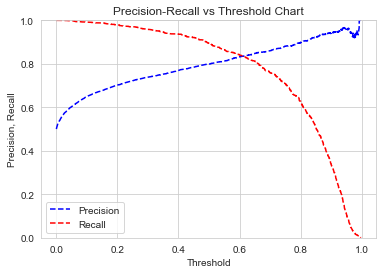

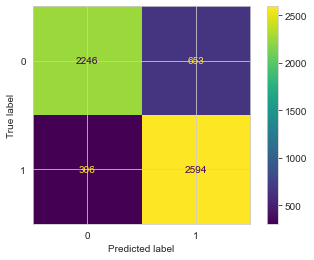

In [44]:
#importing and training the model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
lr = LogisticRegression(C=9.921,dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1122, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False, class_weight={0: 0.4129145728643216, 1: 0.5870854271356785})

lr.fit(CBE_train,y_trw)

# Predicting on the test data
pred_train = lr.predict(CBE_train)
pred_test = lr.predict(CBE_test)

#Calculating and printing the f1 score 
f1_train = f1_score(y_trw, pred_train)
f1_test = f1_score(y_tew, pred_test)
print('The f1 score for the training data:', f1_train)
print('The f1 score for the testing data:', f1_test)
### Predict test_y values and probabilities based on fitted logistic 
### regression model

pred_y=lr.predict(CBE_test) 

probs_y=lr.predict_proba(CBE_test) 
  # probs_y is a 2-D array of probability of being labeled as 0 (first column of array) vs 1 (2nd column in array)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_tew, probs_y[:, 
1]) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

#Ploting the confusion matrix
cm=confusion_matrix(y_tew,pred_test,labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)
disp.plot()
print("Train \n",classification_report(y_trw,pred_train))
print("Test \n",classification_report(y_tew,pred_test))
plt.show()

***The f1 score improved significantly with this set up also( SMOTEN+ CatBoost Encoder+ Class Weight Optmization)***

The f1 score for the training data: 0.8448937190346812
    
The f1 score for the testing data: 0.8439889376931836

Best Threshold=0.456513, F-Score=0.849


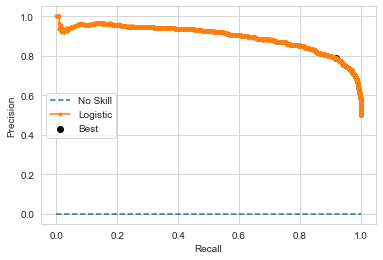

In [48]:
## https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
from numpy import arange
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')
model = LogisticRegression(C=9.921,dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1122, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False, class_weight={0: 0.4129145728643216, 1: 0.5870854271356785})
model.fit(CBE_train,y_trw)
# predict probabilities
yhat = model.predict_proba(CBE_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# keep probabilities for the positive outcome only
#probs = yhat[:, 1]
# define thresholds
thresholds = np.arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_tew, to_labels(yhat, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
#print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

# calculate roc curves
precision, recall, thresholds = precision_recall_curve(y_tew, yhat)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len([y_tew==1]) / len(y_tew)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()


***With CatBoost Encoding***

Best Threshold=0.456513, F-Score=0.849